In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import optuna

2025-06-02 06:12:39.005084: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-02 06:12:39.021802: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 06:12:39.140964: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-02 06:12:39.237157: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1748844759.318131    1679 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1748844759.34

In [4]:
df = pd.read_csv("concreteMerged.csv")  # Rename file if needed
df.columns = [col.strip().replace(' ', '_').lower() for col in df.columns]

X = df.drop('strength', axis=1)
y = df['strength']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale for ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
### Model 1 ###
### Optimized ANN ###

def create_model(trial):
    model = Sequential()
    n_layers = trial.suggest_int("n_layers", 1, 3)
    for i in range(n_layers):
        n_units = trial.suggest_int(f"n_units_l{i}", 16, 128)
        model.add(Dense(n_units, activation='relu'))
    model.add(Dense(1))

    optimizer = Adam(learning_rate=trial.suggest_float("lr", 1e-4, 1e-2, log=True))
    model.compile(optimizer=optimizer, loss='mse')
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train_scaled, y_train, epochs=50, batch_size=trial.suggest_categorical("batch_size", [16, 32, 64]),
              verbose=0)
    pred = model.predict(X_test_scaled)
    return mean_squared_error(y_test, pred)

study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=20)

best_trial = study.best_trial
print("Best Hyperparameters:", best_trial.params)

[I 2025-06-02 06:41:17,430] A new study created in memory with name: no-name-2f5c615a-6fa0-4268-bf4c-ff7b06b0d2cf
E0000 00:00:1748846477.768137    1679 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1748846477.770128    1679 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:41:24,292] Trial 0 finished with value: 157.24272443828562 and parameters: {'n_layers': 1, 'n_units_l0': 63, 'lr': 0.0001437866773741819, 'batch_size': 16}. Best is trial 0 with value: 157.24272443828562.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:41:27,529] Trial 1 finished with value: 18.33945788612144 and parameters: {'n_layers': 3, 'n_units_l0': 95, 'n_units_l1': 124, 'n_units_l2': 89, 'lr': 0.008169676683806795, 'batch_size': 32}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:41:34,878] Trial 2 finished with value: 19.45053131668247 and parameters: {'n_layers': 3, 'n_units_l0': 128, 'n_units_l1': 42, 'n_units_l2': 75, 'lr': 0.004699487917814809, 'batch_size': 16}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:41:38,678] Trial 3 finished with value: 65.65517247151355 and parameters: {'n_layers': 3, 'n_units_l0': 47, 'n_units_l1': 84, 'n_units_l2': 58, 'lr': 0.0003608528317564844, 'batch_size': 64}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:41:43,233] Trial 4 finished with value: 31.906695179730207 and parameters: {'n_layers': 2, 'n_units_l0': 104, 'n_units_l1': 53, 'lr': 0.0009840072784991442, 'batch_size': 32}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:41:49,521] Trial 5 finished with value: 27.42298590425863 and parameters: {'n_layers': 1, 'n_units_l0': 111, 'lr': 0.002345225801473655, 'batch_size': 16}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:41:53,749] Trial 6 finished with value: 110.96554509846993 and parameters: {'n_layers': 1, 'n_units_l0': 102, 'lr': 0.0003803111546669905, 'batch_size': 32}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:41:54,746] Trial 7 finished with value: 131.80997878866873 and parameters: {'n_layers': 1, 'n_units_l0': 46, 'lr': 0.0008019692980736898, 'batch_size': 64}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:41:58,078] Trial 8 finished with value: 76.29660611385165 and parameters: {'n_layers': 2, 'n_units_l0': 26, 'n_units_l1': 115, 'lr': 0.000959578689580044, 'batch_size': 64}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:42:02,309] Trial 9 finished with value: 79.79591611746646 and parameters: {'n_layers': 1, 'n_units_l0': 88, 'lr': 0.0006573352545496214, 'batch_size': 32}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:42:07,389] Trial 10 finished with value: 20.21758080753521 and parameters: {'n_layers': 3, 'n_units_l0': 74, 'n_units_l1': 128, 'n_units_l2': 124, 'lr': 0.00881527910092739, 'batch_size': 32}. Best is trial 1 with value: 18.33945788612144.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:42:14,627] Trial 11 finished with value: 16.987222189909236 and parameters: {'n_layers': 3, 'n_units_l0': 122, 'n_units_l1': 23, 'n_units_l2': 91, 'lr': 0.00978614193913516, 'batch_size': 16}. Best is trial 11 with value: 16.987222189909236.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:42:21,834] Trial 12 finished with value: 27.0474578985968 and parameters: {'n_layers': 2, 'n_units_l0': 127, 'n_units_l1': 19, 'lr': 0.007743209185325665, 'batch_size': 16}. Best is trial 11 with value: 16.987222189909236.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:42:24,923] Trial 13 finished with value: 19.638641026266054 and parameters: {'n_layers': 3, 'n_units_l0': 86, 'n_units_l1': 89, 'n_units_l2': 100, 'lr': 0.0029643819022281575, 'batch_size': 32}. Best is trial 11 with value: 16.987222189909236.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:42:32,153] Trial 14 finished with value: 26.29349079689937 and parameters: {'n_layers': 3, 'n_units_l0': 113, 'n_units_l1': 18, 'n_units_l2': 91, 'lr': 0.0025789362050139975, 'batch_size': 16}. Best is trial 11 with value: 16.987222189909236.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:42:39,520] Trial 15 finished with value: 18.078386904496337 and parameters: {'n_layers': 3, 'n_units_l0': 89, 'n_units_l1': 104, 'n_units_l2': 23, 'lr': 0.005029177974550002, 'batch_size': 16}. Best is trial 11 with value: 16.987222189909236.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:42:46,383] Trial 16 finished with value: 25.918099074151986 and parameters: {'n_layers': 2, 'n_units_l0': 73, 'n_units_l1': 99, 'lr': 0.004556937472904292, 'batch_size': 16}. Best is trial 11 with value: 16.987222189909236.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:42:53,733] Trial 17 finished with value: 22.27561242043792 and parameters: {'n_layers': 3, 'n_units_l0': 120, 'n_units_l1': 59, 'n_units_l2': 20, 'lr': 0.0018199912483008935, 'batch_size': 16}. Best is trial 11 with value: 16.987222189909236.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


[I 2025-06-02 06:42:58,571] Trial 18 finished with value: 24.24603866365895 and parameters: {'n_layers': 2, 'n_units_l0': 59, 'n_units_l1': 74, 'lr': 0.005147928805794243, 'batch_size': 16}. Best is trial 11 with value: 16.987222189909236.


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


[I 2025-06-02 06:43:05,914] Trial 19 finished with value: 19.89392364575936 and parameters: {'n_layers': 3, 'n_units_l0': 87, 'n_units_l1': 102, 'n_units_l2': 19, 'lr': 0.001628202920854809, 'batch_size': 16}. Best is trial 11 with value: 16.987222189909236.


Best Hyperparameters: {'n_layers': 3, 'n_units_l0': 122, 'n_units_l1': 23, 'n_units_l2': 91, 'lr': 0.00978614193913516, 'batch_size': 16}


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def build_final_model(params):
    model = Sequential()
    
    for i in range(params['n_layers']):
        units = params[f'n_units_l{i}']
        if i == 0:
            model.add(Dense(units, activation='relu', input_shape=(X_train_scaled.shape[1],)))
        else:
            model.add(Dense(units, activation='relu'))
    
    model.add(Dense(1))  # Output layer

    optimizer = Adam(learning_rate=params['lr'])
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

    return model

In [10]:
final_model = build_final_model(best_trial.params)

history = final_model.fit(
    X_train_scaled, y_train,
    epochs=100,  # increase for better performance
    batch_size=best_trial.params['batch_size'],
    validation_split=0.1,
    verbose=1
)

Epoch 1/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 532.5414 - mae: 17.6939 - val_loss: 151.0215 - val_mae: 9.5274
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 124.2535 - mae: 8.5900 - val_loss: 59.1441 - val_mae: 6.0610
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 66.5903 - mae: 6.2669 - val_loss: 84.9167 - val_mae: 7.0552
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 63.4265 - mae: 6.1510 - val_loss: 45.5908 - val_mae: 5.0484
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42.3170 - mae: 4.9294 - val_loss: 44.0222 - val_mae: 4.9072
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 40.7770 - mae: 4.9378 - val_loss: 38.1092 - val_mae: 4.9216
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35.7232 - mae: 4.5295 - val_loss: 35.2418 - val_mae: 4.5205
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32.2681 - mae: 4.2817 - val_loss: 43.4980 - val_mae: 5.1021
Epoch 9/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train XGBoost
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [12]:
loss, mae = final_model.evaluate(X_test_scaled, y_test)
predictions = final_model.predict(X_test_scaled)

from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Final ANN RMSE: {rmse:.4f}")
print(f"Final ANN R²: {r2:.4f}")

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 13.9660 - mae: 2.7786 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Final ANN RMSE: 13.6955
Final ANN R²: 0.9470


In [17]:
rf_preds = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, rf_preds)
rf_r2 = r2_score(y_test, rf_preds)

print(f"RF RMSE: {rf_rmse:.4f}")
print(f"RF R²: {rf_r2:.4f}")


RF RMSE: 10.4472
RF R²: 0.9596


In [20]:
xgb_preds = xgb_model.predict(X_test)

xgb_rmse = mean_squared_error(y_test, xgb_preds)
xgb_r2 = r2_score(y_test, xgb_preds)

print(f"XGBoost RMSE: {xgb_rmse:.4f}")
print(f"XGBoost R²: {xgb_r2:.4f}")


XGBoost RMSE: 7.0580
XGBoost R²: 0.9727


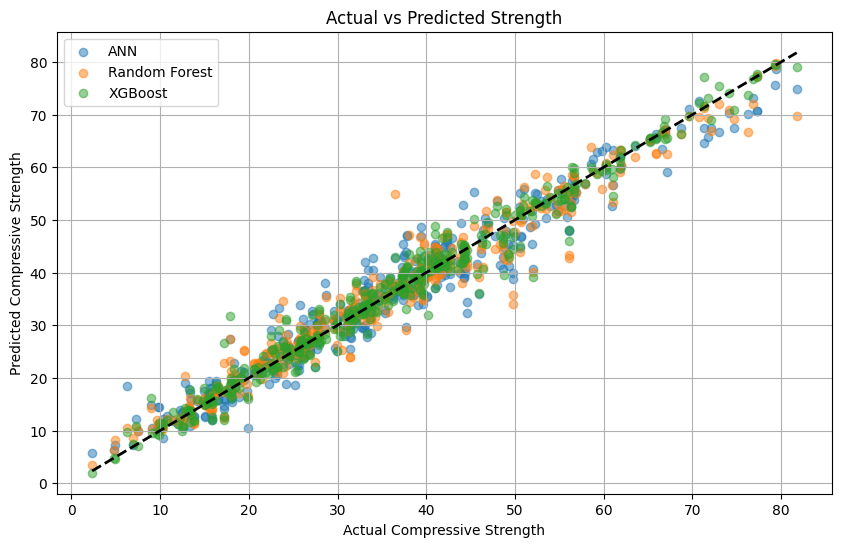

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='ANN')
plt.scatter(y_test, rf_preds, alpha=0.5, label='Random Forest')
plt.scatter(y_test, xgb_preds, alpha=0.5, label='XGBoost')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Compressive Strength")
plt.ylabel("Predicted Compressive Strength")
plt.title("Actual vs Predicted Strength")
plt.legend()
plt.grid(True)
plt.show()

In [21]:
import joblib

joblib.dump(final_model, "ANN.pkl")
joblib.dump(rf_model, "RF.pkl")
joblib.dump(xgb_model, "XGB.pkl")

['XGB.pkl']